# Base de dados do censo:

In [2]:
import pandas as pd

columns = ['age', 'workclass','final-weight' ,'education' ,'education-num' ,
           'marital-status' ,'occupation' ,'relationship' ,'race' ,'sex', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] ## erro: o adult.names q dita todas as headers tava faltando uma btw
base_census = pd.read_csv('adult.data.csv', names=columns, header=None)

base_census.head(10)

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   
5   37            Private        284582     Masters             14   
6   49            Private        160187         9th              5   
7   52   Self-emp-not-inc        209642     HS-grad              9   
8   31            Private         45781     Masters             14   
9   42            Private        159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country  income  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K  
8   Female         14084             0              50   United-States    >50K  
9     Male          5178             0              40   United-States    >50K

In [3]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [4]:
base_census.isnull().sum() ## nao há nulos

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
import numpy as np

np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

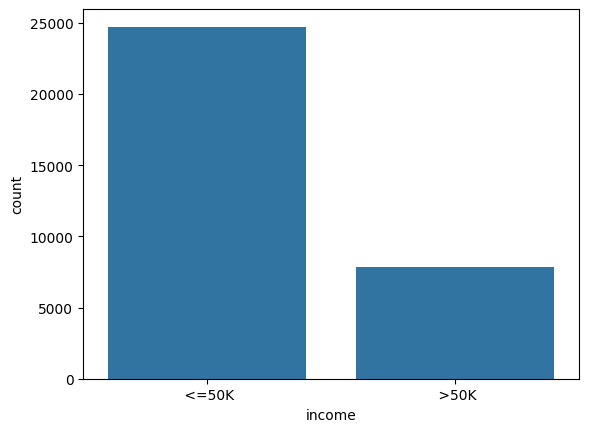

In [13]:
import seaborn as sns

sns.countplot(x = base_census['income']);

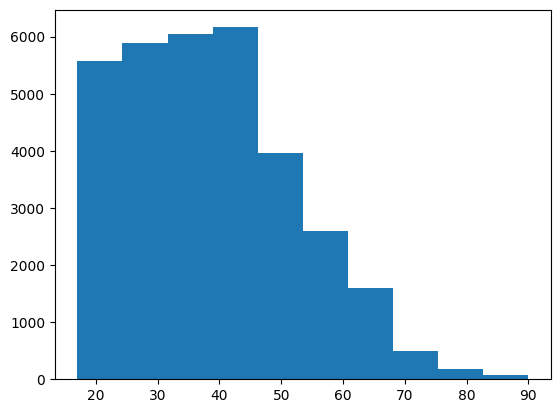

In [7]:
import matplotlib.pyplot as plt

plt.hist(x = base_census['age']);

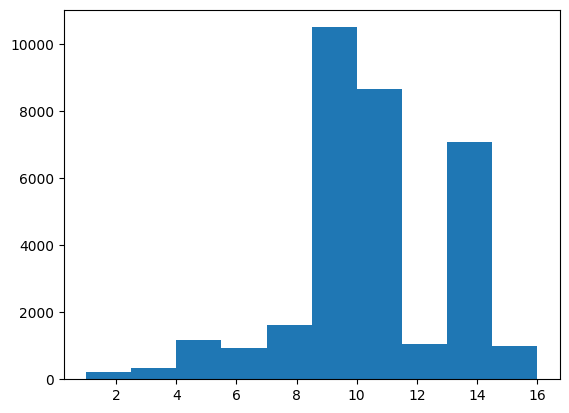

In [14]:
plt.hist(x = base_census['education-num']);

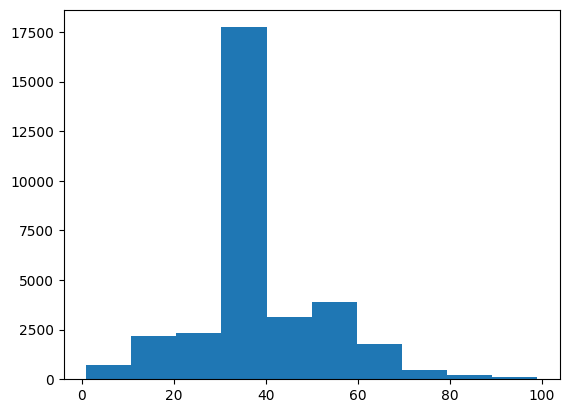

In [8]:
plt.hist(x = base_census['hours-per-week']);

In [9]:
import plotly.express as px

grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [10]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [11]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [16]:
graico = px.parallel_categories(base_census, dimensions = ['relationship', 'income'])
graico.show()

### Divisão entre previsores e classe

In [ ]:
X_census = base_census.iloc[:,0:14].values

In [23]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [28]:
y_census = base_census.iloc[:,14].values
print(y_census)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


### Tratamento de dados categóricos


In [ ]:
from sklearn.preprocessing import LabelEncoder


array [7 6 4 ... 4 4 5]


In [ ]:
# atributos categoricos

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()


X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])



In [42]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [47]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

### Visualização dos dados